# END TERM MACHINE LEARNING PROJECT

# PIMA INDIAN DIABETES DATASET

# SEMESTER -5

# DS-V-E

# PREPARED BY:

## YUKTA BATRA(19CSU364)

## BHAVYA SHARMA(19CSU371)

In [2]:
#import the useful libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import pyplot as np
import matplotlib
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading the dataset
df = pd.read_csv("Diabetes.csv")

In [4]:
# showing the features of dataset
df.keys()

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

In [5]:
# returns no. of rows and columns
df.shape

(768, 10)

In [6]:
# To display top 5 rows
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0.0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0.0,26.6,0.351,31,1.1426,NaN
2,8,183,64,0,0.0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94.0,28.1,0.167,21,0.9062,False
4,0,137,40,35,168.0,43.1,2.288,33,1.3790,True


In [7]:
# tells us about the statistical data
df.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
count,768.000000,768.000000,768.000000,768.000000,764.000000,768.000000,731.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.870419,31.992578,0.472880,33.240885,0.809136
std,3.369578,31.972618,19.355807,15.952218,115.433301,7.884160,0.334589,11.760232,0.628517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.368000,29.000000,0.906200
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.630500,41.000000,1.260800
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600


In [8]:
# Gives info about data type and missing or null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    int64  
 2   diastolic_bp  768 non-null    int64  
 3   thickness     768 non-null    int64  
 4   insulin       764 non-null    float64
 5   bmi           768 non-null    float64
 6   diab_pred     731 non-null    float64
 7   age           768 non-null    int64  
 8   skin          768 non-null    float64
 9   diabetes      735 non-null    object 
dtypes: float64(4), int64(5), object(1)
memory usage: 60.1+ KB


### CHECKING FOR NULL VALUES

In [9]:
df.isnull().values.any()

True

In [10]:
df.isnull().sum()

num_preg         0
glucose_conc     0
diastolic_bp     0
thickness        0
insulin          4
bmi              0
diab_pred       37
age              0
skin             0
diabetes        33
dtype: int64

### REMOVING NULL VALUES

In [11]:
# Removing null values by filling in mean

In [12]:
df['diab_pred']=df['diab_pred'].fillna(df['diab_pred'].mean())
df['insulin']=df['insulin'].fillna(df['insulin'].mean())

In [13]:
# Removing null values by filling in mod

In [14]:
df['diabetes']=df['diabetes'].fillna(df['diabetes'].mode()[0])

In [15]:
# Checking if null values prevail 

In [16]:
df.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

In [17]:
#returns the first five rows of datframe
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0.0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0.0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0.0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94.0,28.1,0.167,21,0.9062,False
4,0,137,40,35,168.0,43.1,2.288,33,1.3790,True


### COUNTPLOT (TO COUNT TRUE/FALSE VALUES)

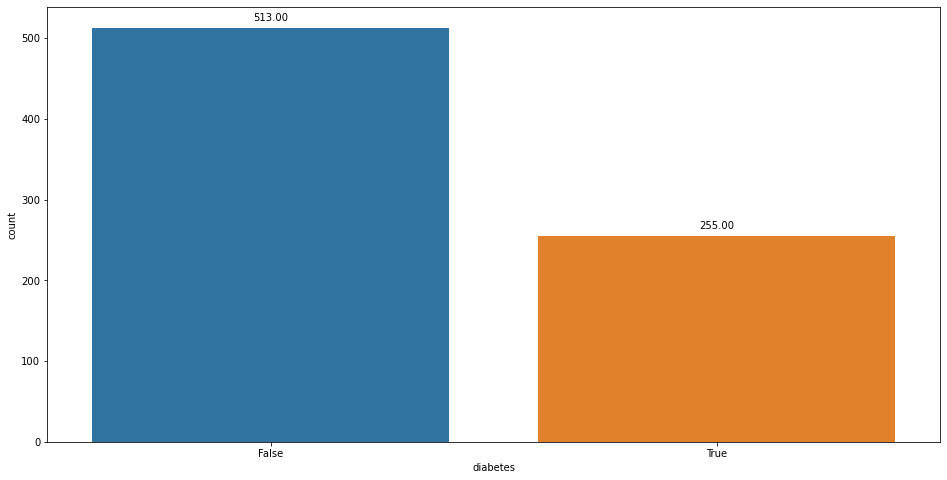

In [18]:
# Categorical attributes visulisation
plt.figure(figsize=(16, 8))
splot = sns.countplot(df['diabetes'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# BAR GRAPH ( BETWEEN AGE AND BMI)

A BMI of between 18.5 and 24.9 is ideal


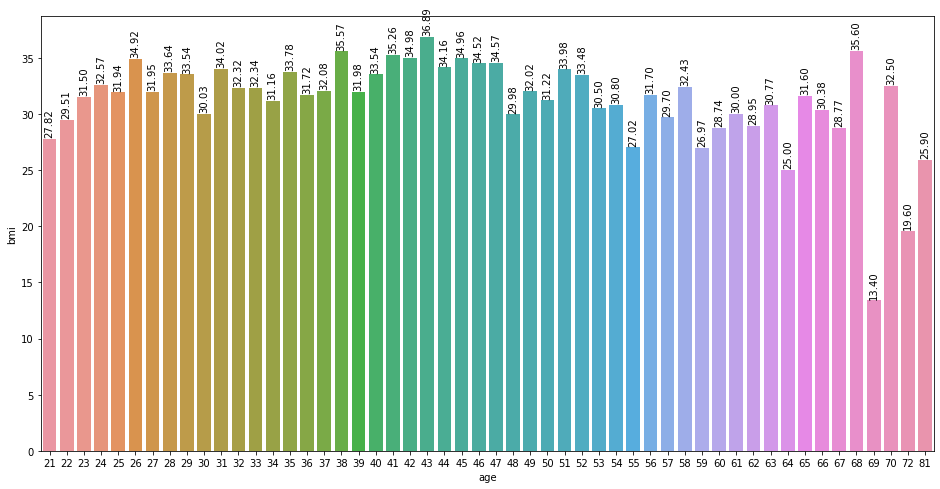

In [19]:
print("A BMI of between 18.5 and 24.9 is ideal")
plt.figure(figsize=(16,8))
splot = sns.barplot(data=df, x = 'age', y = 'bmi', ci = None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 16), rotation = 90, textcoords = 'offset points')

# BOX PLOT

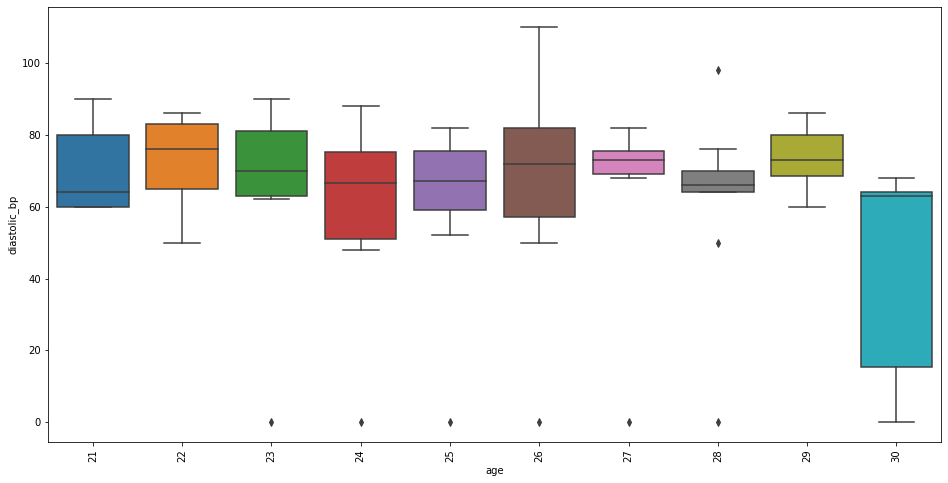

In [20]:
# person below 30 having diabetes
df_30=df[df['age']<=30]
df_30=df_30[df_30['diabetes']==True]

plt.rcParams['figure.figsize']=(16,8)
ax = sns.boxplot(x="age", y="diastolic_bp", data=df_30)
plt.xticks(rotation=90)

plt.show()

# SCATTER PLOT

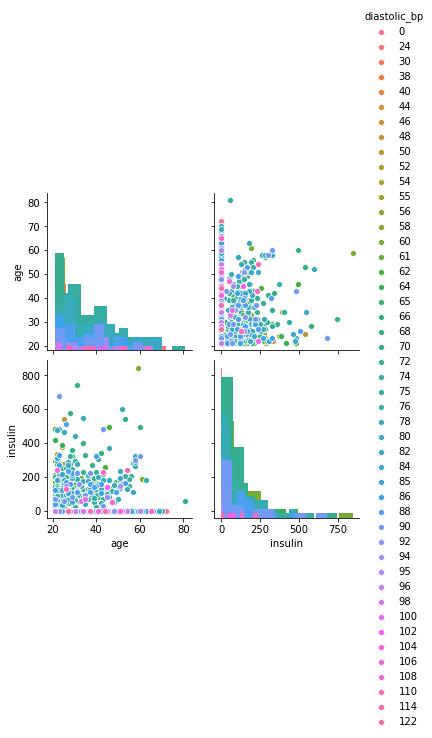

In [21]:
g = sns.pairplot(df[["age", "insulin", "diastolic_bp"]], hue="diastolic_bp", diag_kind="hist")

# LABEL-ENCODING

CHANGING THE CATEGORICAL VALUE TO NUMERICAL VALUE I.E. BOOLEAN TO NUMBER

In [22]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'diabetes'. 
df['diabetes']= label_encoder.fit_transform(df['diabetes']) 

df['diabetes'].unique() 

array([1, 0], dtype=int64)

In [23]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0.0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0.0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0.0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94.0,28.1,0.167,21,0.9062,0
4,0,137,40,35,168.0,43.1,2.288,33,1.3790,1


In [24]:
diabetes_true_count = len(df.loc[df['diabetes']==True])
diabetes_false_count = len(df.loc[df['diabetes']==False])

In [25]:
print("True count:",diabetes_true_count)
print("False count:",diabetes_false_count)

True count: 255
False count: 513


# FEATURE SELECTION

### Chi-Squared / χ2 test

Selecting best features to use for model training

In [26]:
x = df.iloc[:,0:10] #independent columns
y = df.iloc[:,-1]   #target column i.e chances of having diabetes or not [0 or 1]

In [27]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(x,y)

In [28]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [29]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [30]:
featureScores

,Specs,Score
0,num_preg,113.389232
1,glucose_conc,1354.291045
2,diastolic_bp,19.500849
3,thickness,58.976414
4,insulin,3054.124060
5,bmi,107.531673
6,diab_pred,5.512583
7,age,169.475055
8,skin,2.323671
9,diabetes,513.000000


##### Here we have total 10 features, higher the score more important the feature is, insulin has the max value thus making it the most important feature, the values that are higher are much more cor-related and important.

In [31]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

          Specs        Score
4       insulin  3054.124060
1  glucose_conc  1354.291045
9      diabetes   513.000000
7           age   169.475055
0      num_preg   113.389232
5           bmi   107.531673
3     thickness    58.976414
2  diastolic_bp    19.500849
6     diab_pred     5.512583
8          skin     2.323671


In [32]:
# Visualisation of best features in Descending Order

<Figure size 360x360 with 0 Axes>

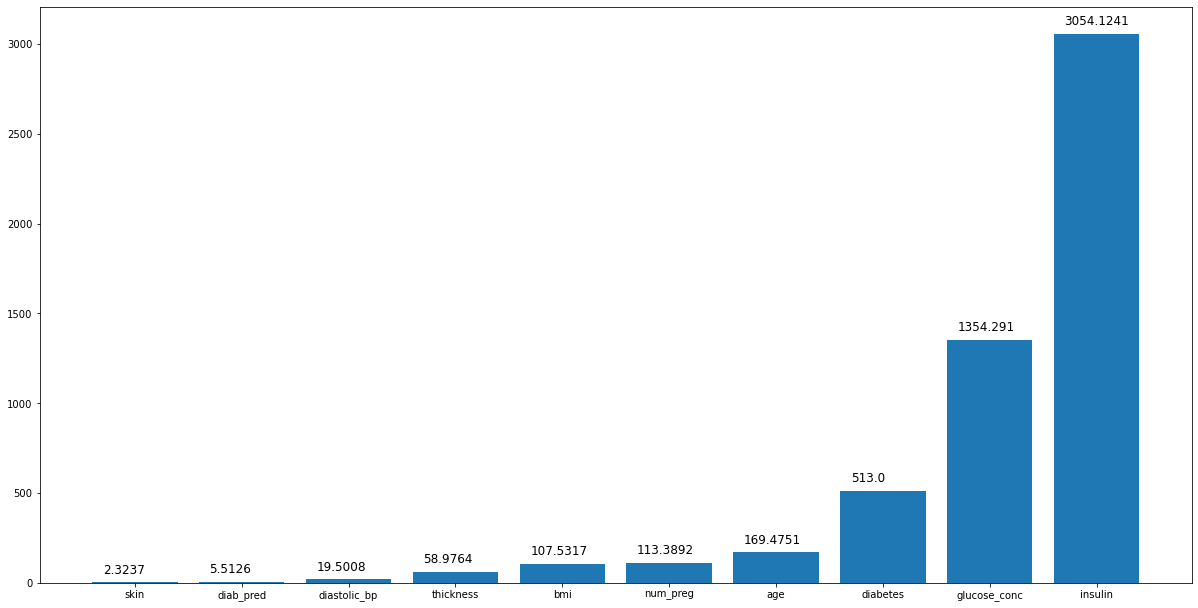

In [33]:
plt.figure(figsize=(5,5))
featureScores = featureScores.sort_values('Score')
featureScores
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(featureScores['Specs'],featureScores['Score'])
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.1, i.get_height()+51, \
            str(round((i.get_height()/100)*100, 4)), fontsize=12,
                color='black',rotation=0)
plt.show()

# Classifier

1. Logistic Regression 
2. KNN Classifier / Cross Validation

# LOGISTIC REGRESSION

In [34]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [35]:
y_predict_train = classifier.predict(X_train)

NameError: name 'X_train' is not defined

In [77]:
y_predict_test = classifier.predict(X_test)

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       102
           1       0.71      0.58      0.64        52

   micro avg       0.78      0.78      0.78       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.78      0.77       154



## Accuracy

In [79]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_predict_test)*100)

Accuracy: 77.92207792207793


# KNN CLASSIFIER USING CV

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,x_train,y_train,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

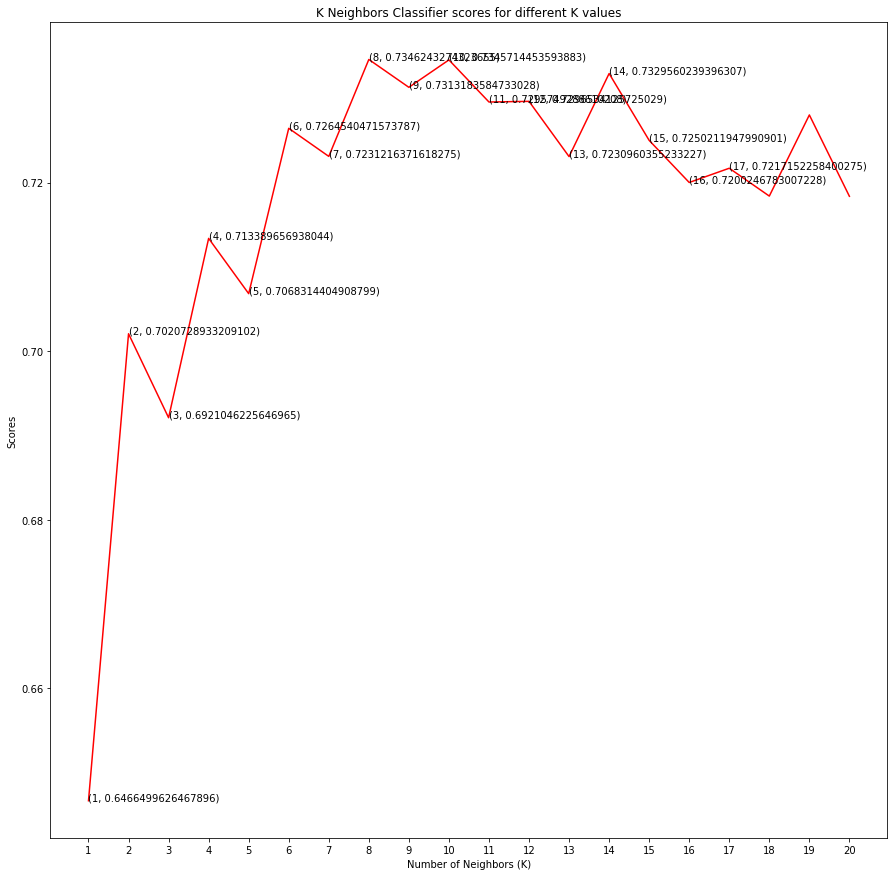

In [82]:
plt.figure(figsize=(15,15))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,18):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [83]:
knn_classifier = KNeighborsClassifier(n_neighbors = 20)
score=cross_val_score(knn_classifier,x_train,y_train,cv=10)

## Accuracy / Score

In [84]:
#evaluting predictions
score.mean()
print("Accuracy: %.2f%%" % (score.mean() * 100.0))

Accuracy: 71.84%


# REGRESSION

In [88]:
model_name=[]
scores=[]
rmse=[]

In [89]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Converting Dataframe to Array

In [100]:
import matplotlib.pyplot as plt 
import numpy as np 
P = np.array(P).reshape(-1, 1)
Q = np.array(Q).reshape(-1, 1) 

# SIMPLE LINEAR REGRESSION

In [101]:
#Fitting Simple linear Regression to the training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [102]:
# Intercept is the expected mean value of y when all x = 0
# Coefficient tells us how much the dependent variable is expected to increase when that independent variable increases by one, holding all the other independent variables constant.

In [103]:
print('Coefficients\n',regressor.coef_)

print('Intercept\n',regressor.intercept_)

Coefficients
 [[2.07521088e-02 6.16784214e-03 6.77912871e-04 6.75693246e-05
  1.10910989e-02 2.23876398e-03]]
Intercept
 [-0.97752219]


In [104]:
#Predicting the Test set results
y_pred=regressor.predict(X_test)

Error Calculation 

1. Mean Absolute Error
2. Mean Squared Error
3. Root Mean Sq. Error
4. R2 Score

In [105]:
from sklearn.metrics import classification_report
mae_lin = mean_absolute_error(y_test,y_pred)
mse_lin = mean_squared_error(y_test, y_pred) 
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred)) 
r2_score_lin = r2_score(y_test, y_pred)

In [106]:
mae_lin

0.30199416235968535

In [107]:
mse_lin

0.1420342025027932

In [108]:
rmse_lin

0.3768742529051211

In [109]:
r2_score_lin

0.3649164504984458

In [110]:
# Appending scores in the list

In [111]:
model_name.append("Simple Linear Regression")
scores.append(format(r2_score(y_test,y_pred)))
rmse.append(format(mean_squared_error(y_test,y_pred)))

# Decision Tree Regression

In [129]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(P_train, q_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [130]:
#Predicting the Test set results
q_pred = tree_reg.predict(P_test)

Error Calculation 

1. Mean Absolute Error
2. Mean Squared Error
3. Root Mean Sq. Error
4. R2 Score

In [131]:
mae_dtr = mean_absolute_error(q_test,q_pred)
mse_dtr = mean_squared_error(q_test, q_pred) 
rmse_dtr = np.sqrt(mean_squared_error(q_test, q_pred)) 
r2_score_dtr = r2_score(q_test, q_pred)

In [132]:
mae_dtr

11.731692387698883

In [133]:
mse_dtr

216.9304339398102

In [134]:
rmse_dtr

14.728558447445229

In [137]:
r2_score_dtr

0.826533761516945

In [140]:
# Appending scores in the list 

In [141]:
model_name.append("Decision Tree Regression")
rmse.append(np.sqrt(mean_squared_error(q_test, q_pred)))
scores.append(r2_score_dtr)
                                                          

# Summary

In [154]:
import statsmodels.api as sm

In [155]:
rmse

['0.1420342025027932',
 '137.94154299532747',
 14.728558447445229,
 14.728558447445229,
 14.045925991480384]

In [156]:
scores

['0.3649164504984458',
 0.9013134731477869,
 0.826533761516945,
 0.826533761516945,
 0.9162501459919679]

In [157]:
model_name

['Simple Linear Regression',
 'Polynomial Regression',
 'Decision Tree Regression',
 'Decision Tree Regression',
 'Random Forest Regression']

In [158]:
df_summary = pd.DataFrame(model_name,columns=['Model'])
df_summary["Score"]=scores
df_summary["RMSE"]=rmse

In [159]:
df_summary

,Model,Score,RMSE
0,Simple Linear Regression,0.3649164504984458,0.1420342025027932
1,Polynomial Regression,0.901313,137.94154299532747
2,Decision Tree Regression,0.826534,14.7286
3,Decision Tree Regression,0.826534,14.7286
4,Random Forest Regression,0.91625,14.0459


In [178]:
import pandas as pd
data = {'Model': ['SINGLE LINKAGE', 'COMPLETE LINKAGE' , 'AVERAGE LINKAGE' ], 'DB SCORE': [.48,1.44,.76] , 'SS SCORE' : [.27,.15,.30]}
df = pd.DataFrame(data)
print(df)

              Model  DB SCORE  SS SCORE
0    SINGLE LINKAGE      0.48      0.27
1  COMPLETE LINKAGE      1.44      0.15
2   AVERAGE LINKAGE      0.76      0.30
